In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path ="/content/drive/MyDrive/Colab Notebooks/GurNum-20230429T114523Z-001/GurNum"
val_path = "/content/drive/MyDrive/Colab Notebooks/GurNum-20230429T114523Z-001/GurNum"



In [4]:
# To set the path to the folder containing the required folder
data_directory = train_path
# Set the image size
s_img = (32, 32)
# For empty lists for the imgs and labels
imgs = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
 folder_path = os.path.join(data_directory, 'train', str(label))
 # Loop over each image in the folder
 for file in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file)
  if file_path.endswith(('.tiff','.bmp')):
 # Load the image and resize it to the desired size
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, s_img)
 # Append the image and label to the lists
    imgs.append(img)
    labels.append(label)
# Convert the lists to NumPy arrays
imgs = np.array(imgs)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', imgs)
np.save('y_train.npy', labels)


In [5]:
#To set the path to the folder containing the 'val' folder
direc_val = val_path
# Set the image size
image_sval = (32, 32)
#To create empty lists for the images and labels
imgs_val = []
labels_val = []
# Looping over each folder from '0' to '9'
for label in range(10):
  folder_path = os.path.join(direc_val, 'val', str(label))

 # Looping over each image in the folder
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if file_path.endswith(('.tiff','.bmp')):
 # To load the image and resize it to the desired size
      img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, image_sval)
 # Appending the image and label to the lists
      imgs_val.append(img)
      labels_val.append(label)
# Converting the lists to NumPy arrays
imgs_val = np.array(imgs_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', imgs_val)
np.save('y_test.npy', labels_val)

In [6]:
# Loading the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


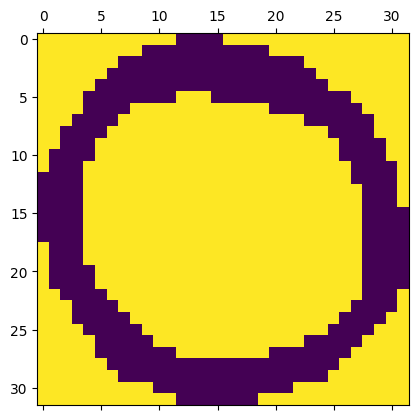

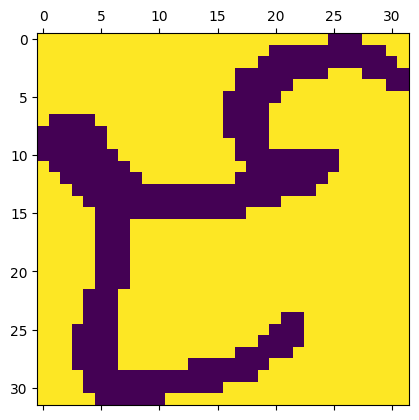

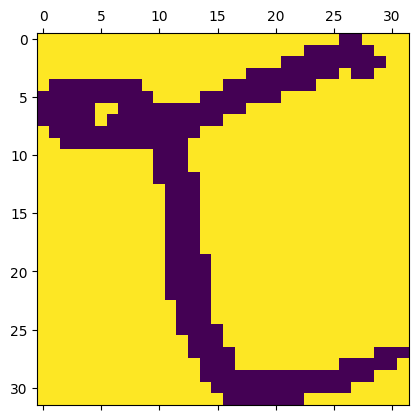

In [7]:
#Testing the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

In [8]:
# # flatten the dataset i.e, change 2D to 1D (skipped this , and flattened in the rslt)
# x_train_flat = x_train.reshape(len(x_train),32*32)
# x_test_flat = x_test.reshape(len(x_test),32*32)
# print(x_train_flat.shape)
# print(x_test_flat.shape)
# x_train_flat[0]

In [9]:

# To create a simple nn
# To create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
rslt = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
rslt.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
rslt.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 11ms/step - loss: 148.0405 - accuracy: 0.3720 - val_loss: 71.6983 - val_accuracy: 0.6124
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 32.1867 - accuracy: 0.7750 - val_loss: 40.6688 - val_accuracy: 0.7303
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 17.7702 - accuracy: 0.8560 - val_loss: 28.9645 - val_accuracy: 0.7472
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 11.6337 - accuracy: 0.8840 - val_loss: 20.7318 - val_accuracy: 0.8202
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 6.0802 - accuracy: 0.9260 - val_loss: 28.1102 - val_accuracy: 0.8483
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 5.7264 - accuracy: 0.9450 - val_loss: 20.5810 - val_accuracy: 0.8483
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 4.7518 - accuracy: 0.9420 - val_loss: 33.3524 - val_accuracy: 0.7978
Epoch 8

In [10]:
# Observation : It gave a better accuracy in iterarion 2

In [11]:
# To check accuracy after scaling
x_train_scaled = x_train/255
x_test_scaled = x_test/255
rslt.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 12ms/step - loss: 0.8594 - accuracy: 0.7990 - val_loss: 1.2742 - val_accuracy: 0.4888
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.8712 - accuracy: 0.7920 - val_loss: 1.1426 - val_accuracy: 0.5955
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7910 - accuracy: 0.8590 - val_loss: 1.0563 - val_accuracy: 0.7247
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7415 - accuracy: 0.9040 - val_loss: 1.0025 - val_accuracy: 0.7921
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7091 - accuracy: 0.9380 - val_loss: 0.9651 - val_accuracy: 0.8427
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6857 - accuracy: 0.9600 - val_loss: 0.9404 - val_accuracy: 0.8596
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6685 - accuracy: 0.9770 - val_loss: 0.9212 - val_accuracy: 0.8652
Epoch 8/10
32/32 [=

In [12]:
# Observation : Provided a better accuracy after scaling

In [13]:
# To evaluate test dataset
rslt.evaluate(x_test_scaled,y_test)


6/6 [==============================] - 0s 4ms/step - loss: 0.8840 - accuracy: 0.8820


[0.8839666843414307, 0.882022500038147]

In [14]:

# Observation : Result reached almost same as the training dataset

6/6 [==============================] - 0s 3ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


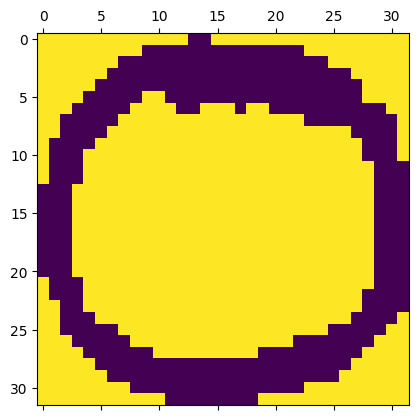

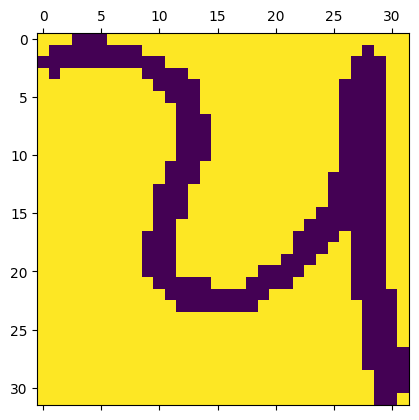

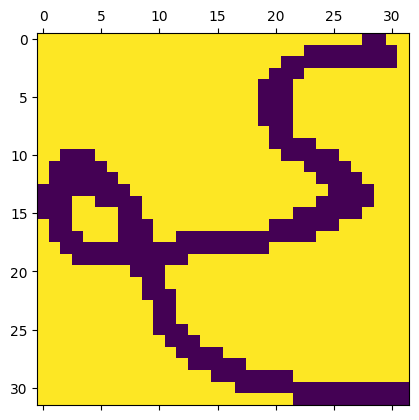

In [15]:
# Predicting 1st image
plt.matshow(x_test[0])
y_pred = rslt.predict(x_test_scaled)
y_pred[0]
# To show the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_pred[0]))
# Testing some more values
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_pred[88]))
plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_pred[177]))

In [16]:

# From above, some predictions are not right. TO check the confusion matrix and to concrete values
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels, len(y_pred_labels))
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
conf_matrix

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 7, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 5, 2, 2, 2, 2, 5, 2, 2, 7, 2, 2, 1, 2, 2, 2, 2, 9, 5, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 7, 6, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 6, 9, 9, 9, 9, 8, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  1, 12,  0,  0,  2,  0,  1,  0,  1],
       [ 0,  0,  0, 15,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  1,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 17,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0,  1, 17]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

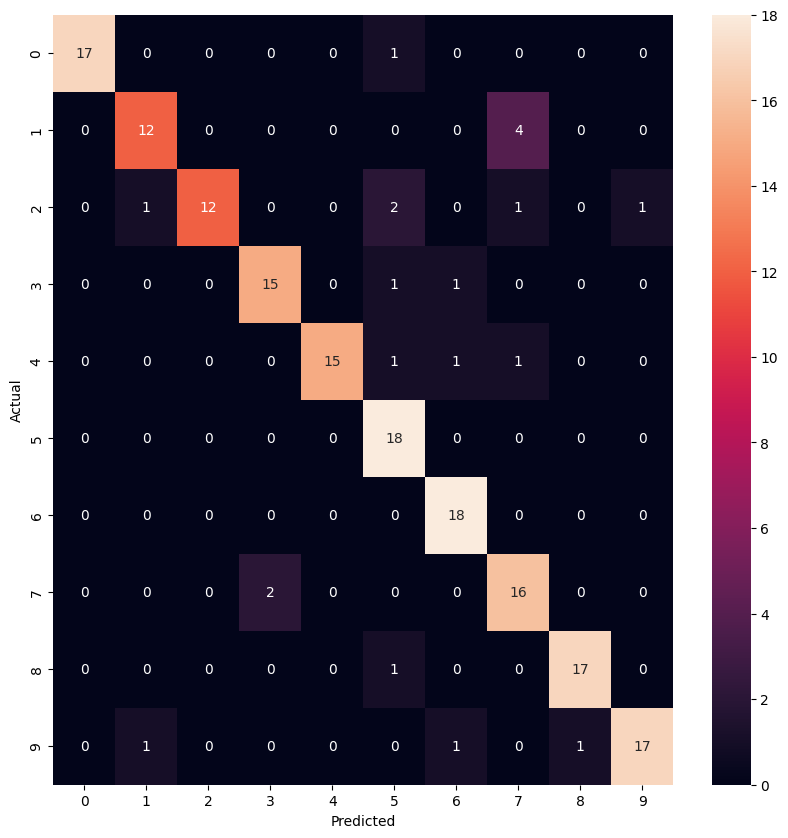

In [17]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [18]:
# Shows some errors
# Thus modifying our nn, we add some layers in the above rslt and different activation function

In [19]:
#In 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9) ,2nd Dense layer,the input is 10 neurons from above layers output
# Adding more layers for accuracy
result2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
# compile the nn
result2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the rslt
# some 10 iterations done here
history = result2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 2s 29ms/step - loss: 1.1095 - accuracy: 0.6920 - val_loss: 0.4977 - val_accuracy: 0.8315
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 0.1753 - accuracy: 0.9500 - val_loss: 0.3985 - val_accuracy: 0.8708
Epoch 3/10
32/32 [==============================] - 1s 22ms/step - loss: 0.1120 - accuracy: 0.9630 - val_loss: 0.2824 - val_accuracy: 0.9101
Epoch 4/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0782 - accuracy: 0.9760 - val_loss: 0.2330 - val_accuracy: 0.9326
Epoch 5/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0504 - accuracy: 0.9880 - val_loss: 0.2076 - val_accuracy: 0.9438
Epoch 6/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0224 - accuracy: 0.9990 - val_loss: 0.1658 - val_accuracy: 0.9607
Epoch 7/10
32/32 [==============================] - 1s 21ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.1771 - val_accuracy: 0.9551
Epoch 8/10
32

In [20]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified rslt
result2.evaluate(x_test_scaled,y_test)


6/6 [==============================] - 0s 6ms/step - loss: 0.1677 - accuracy: 0.9551


[0.16765904426574707, 0.9550561904907227]

In [21]:
# Earlier we got 0.9213483333587646 now we got 0.949438214302063 accuracy
# Againg running the confusion matrix to check and then converting to concrete values
y_pred = result2.predict(x_test_scaled)
y_pred[0]
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels, len(y_pred_labels))
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
conf_matrix


6/6 [==============================] - 0s 5ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 15,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

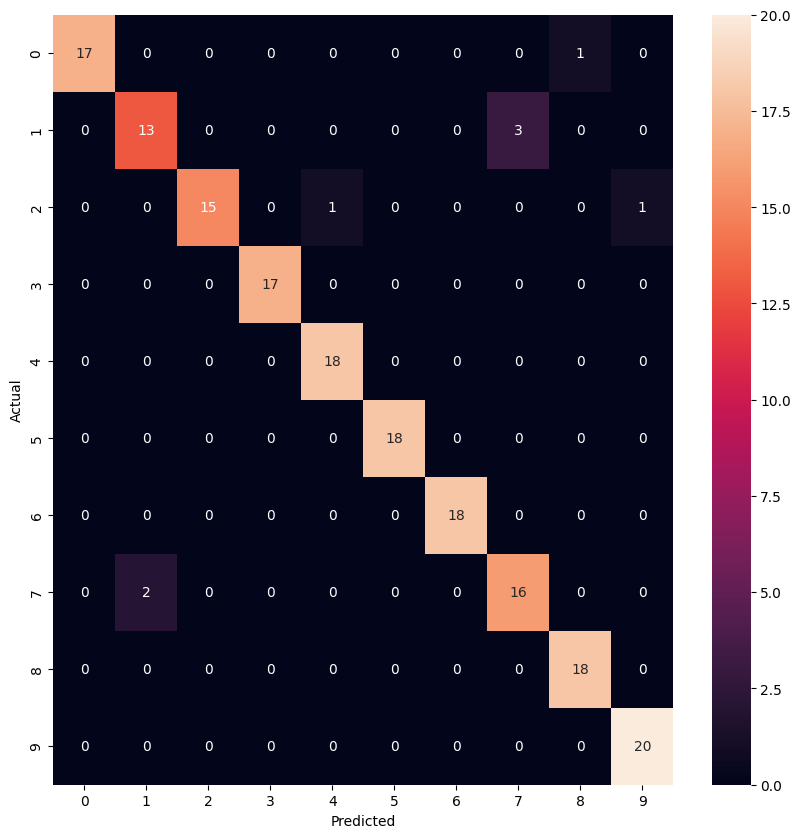

In [22]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 3ms/step - loss: 16.9554 - accuracy: 0.8708
Test accuracy: 0.8707864880561829


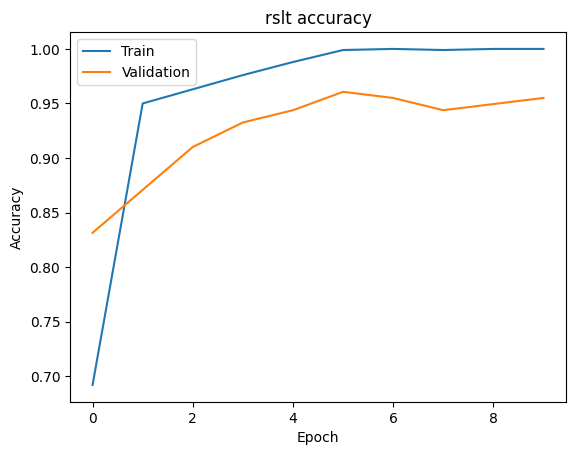

In [23]:
# Observatoin : we see in the updated the model(rslt), there are less number of errors,
# whatever is not in diagonal is a error
# Evaluate the rslt
test_loss, test_acc = rslt.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('rslt accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()